Project 4: Group exercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
np.random.seed(42)

from matplotlib import rcParams
rcParams.update({'figure.autolayout':True})

%matplotlib inline

In [2]:
prediction_data=pd.read_csv('./assets/test.csv')

In [3]:
working_data=pd.read_csv('./assets/train.csv')

In [4]:
NOAA=pd.read_csv('./assets/weather.csv')

In [5]:
spray=pd.read_csv('./assets/spray.csv')

In [6]:
train, test=train_test_split(working_data, test_size=.20, random_state=523)

In [7]:
NOAA.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [8]:
NOAA.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [9]:
# Convert the dates to datetime format
NOAA['Date'] = pd.to_datetime(NOAA['Date'])
working_data['Date'] = pd.to_datetime(working_data['Date'])
prediction_data['Date'] = pd.to_datetime(prediction_data['Date'])
spray['Date'] = pd.to_datetime(spray['Date'])

In [10]:
NOAA.at[2410, 'StnPressure'] = 29.34
NOAA.at[2411, 'StnPressure'] = 29.34
NOAA.at[2943, 'Depart'] = -5

In [11]:
# Get rid of all station 2 input
NOAA = NOAA[NOAA['Station'] == 1]

In [12]:
#changing the values 'M' values to the straight average in 'Tavg'
new_vals = []

for i, x in enumerate(NOAA['Tavg']):
    if x == 'M':
        avg = (NOAA['Tmax'].loc[i] + NOAA['Tmin'].loc[i]) / 2
        new_vals.append(avg)
    else:
        new_vals.append(x)
        
NOAA['Tavg'] = new_vals
NOAA['Tavg'] = NOAA['Tavg'].astype(int)

In [13]:
#Forward filling missing values in wetbulb
NOAA['WetBulb'] = NOAA['WetBulb'].replace('M', np.nan).fillna(method='ffill').astype(int)

#Forward filling missing values in cool/heat/stnPressure/Avgspeed
NOAA['Heat'] = NOAA['Heat'].replace('M', np.nan).fillna(method='ffill').astype(float)
NOAA['Cool'] = NOAA['Cool'].replace('M', np.nan).fillna(method='ffill').astype(float)
NOAA['StnPressure'] = NOAA['StnPressure'].replace('M', np.nan).fillna(method='ffill').astype(float)
NOAA['AvgSpeed'] = NOAA['AvgSpeed'].replace('M', np.nan).fillna(method='ffill').astype(float)


#dropping columns

NOAA =NOAA.drop(['Sunrise', 'Sunset', 'CodeSum', 'Depth', 'Water1', 
                        'SnowFall', 'SeaLevel'], axis = 1)
NOAA = NOAA.drop('Depart', axis=1)

#Changing the 'T' for trace rain to a quantity of 0.001, forward filling 'M' values
NOAA['PrecipTotal'] = NOAA['PrecipTotal'].apply(lambda x: 0.001 if x == '  T' 
                                                      else x).replace('M', np.nan).fillna(method='ffill').astype(float)

#Replacing missing sealevel values with the mean sealevel
# NOAA['SeaLevel'] = NOAA['SeaLevel'].replace('M', np.nan).astype(float)
# mean_sea = NOAA['SeaLevel'].mean()
# NOAA['SeaLevel'] = NOAA['SeaLevel'].fillna(mean_sea)

In [14]:
df = pd.merge(working_data, NOAA, on='Date', how='left')

In [15]:
df.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,74,58,65,0.0,9.0,0.0,29.39,5.8,18,6.5


C:\Users\kiraz\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


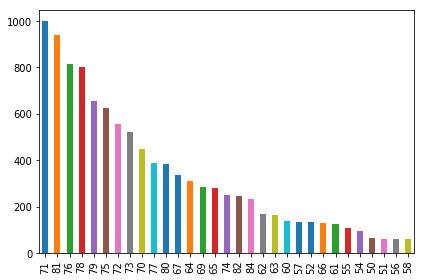

In [16]:
df['Tavg'].value_counts().plot('bar')

In [17]:
#dropping some columns for now
df = df.drop(['Address', 'AddressNumberAndStreet', 'Block', 'Street'], axis = 1)
df = df.drop('AddressAccuracy', axis=1)

In [18]:
df.head(1)

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,1,0,1,88,60,74,58,65,0.0,9.0,0.0,29.39,5.8,18,6.5


In [19]:
df = df.merge(spray, how = 'left', on = 'Date')

In [20]:
df.head(1)

,Date,Species,Trap,Latitude_x,Longitude_x,NumMosquitos,WnvPresent,Station,Tmax,Tmin,...,Heat,Cool,PrecipTotal,StnPressure,ResultSpeed,ResultDir,AvgSpeed,Time,Latitude_y,Longitude_y
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,1,0,1,88,60,...,0.0,9.0,0.0,29.39,5.8,18,6.5,NaN,NaN,NaN


In [21]:
df.drop(['Latitude_y', 'Longitude_y'], axis = 1,inplace= True)

In [22]:
df.rename(columns={'Latitude_x': 'Latitude', 'Longitude_x':'Longitude'}, inplace=True)

In [23]:
df.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Station,Tmax,Tmin,...,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,ResultSpeed,ResultDir,AvgSpeed,Time
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,1,88,60,...,58,65,0.0,9.0,0.0,29.39,5.8,18,6.5,NaN
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0,1,88,60,...,58,65,0.0,9.0,0.0,29.39,5.8,18,6.5,NaN
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0,1,88,60,...,58,65,0.0,9.0,0.0,29.39,5.8,18,6.5,NaN
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0,1,88,60,...,58,65,0.0,9.0,0.0,29.39,5.8,18,6.5,NaN
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0,1,88,60,...,58,65,0.0,9.0,0.0,29.39,5.8,18,6.5,NaN


In [26]:
df1= df.groupby([df['Date'].dt.month])[['Trap','NumMosquitos', 'WnvPresent', 'Tavg']].mean()
df1.head()

,NumMosquitos,WnvPresent,Tavg
Date,,,
5,2.738095,0.000000,62.761905
6,10.552514,0.000637,68.591980
7,12.916561,0.013120,69.058822
8,14.939324,0.186071,71.449347
9,9.481064,0.056357,69.413886


In [31]:
# df.loc[(df['Date']<'20011-05-29')&(df['Date']>='2007-07-01')&(df['Station']==1),:]